In [21]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("adult.csv")

In [9]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [23]:
df[df=="?"]=np.nan

In [26]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [37]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [43]:
cat_cols=df.select_dtypes(object).columns


In [ ]:
df_test=df[df["workclass"].isnull()]
df_test[["workclass","occupation"]].value_counts()

Series([], Name: count, dtype: int64)

In [60]:
df.dropna(inplace=True)

In [90]:
df["age"].describe()

count    30162.000000
mean        38.437902
std         13.134665
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [ ]:
df["hours_per_week_seg"]=pd.cut(df["hours.per.week"],
        bins=[0, 20, 40, 60, 80, 100],
        labels=["0-20", "20-40", "40-60", "60-80", "80-100"])

In [94]:
df["age_seg"]=pd.cut(x=df["age"],
        bins=[17, 30, 40, 60, 80, 100],
        labels=["17-30", "30-40", "40-60", "60-80", "80-100"])   

In [93]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hours_per_week_seg,age_seg
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0-20,80-100
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,20-40,40-60
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,20-40,40-60
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,40-60,20-40
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,20-40,20-40


In [121]:
df["native.country"].value_counts()

native.country
United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Taiwan                           42
Haiti                            42
Iran                             42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador      

/var/folders/50/8zx_6x713jv2x3s7tf2tpsqr0000gn/T/ipykernel_34146/2502338972.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("hours_per_week_seg")["income"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True)


<Axes: xlabel='hours_per_week_seg'>

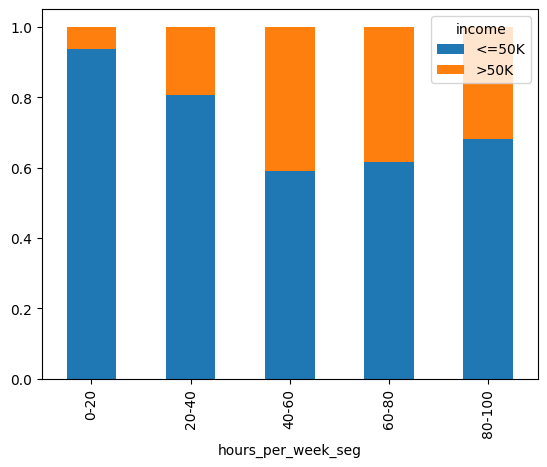

In [89]:
df.groupby("hours_per_week_seg")["income"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True)        

/var/folders/50/8zx_6x713jv2x3s7tf2tpsqr0000gn/T/ipykernel_34146/3022628699.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_seg")["income"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True)


<Axes: xlabel='age_seg'>

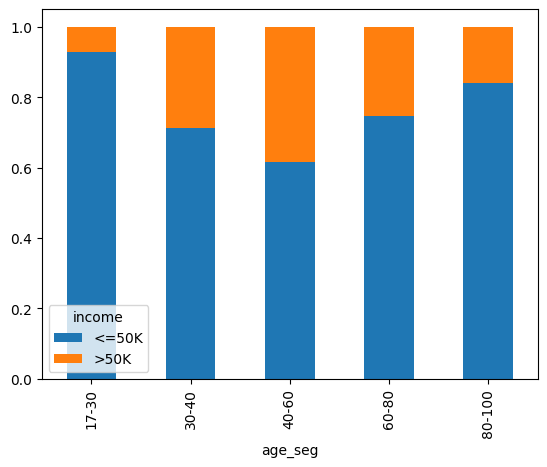

In [ ]:
df.groupby("age_seg")["income"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True)        

In [104]:
df[df["age_seg"]=="40-60"].groupby(["income", "sex"]).agg({"income": "count"})

income
income sex           
<=50K  Female    2507
       Male      4031
>50K   Female     530
       Male      3528

In [122]:
for col in cat_cols:
    print(df[df["age_seg"]=="40-60"][col].value_counts())
    print("##########################################")

workclass
Private             6913
Self-emp-not-inc    1155
Local-gov            963
Self-emp-inc         565
State-gov            519
Federal-gov          479
Without-pay            2
Name: count, dtype: int64
##########################################
education
HS-grad         3399
Some-college    2074
Bachelors       1798
Masters          901
Assoc-voc        442
Assoc-acdm       328
Prof-school      272
10th             256
7th-8th          241
11th             238
Doctorate        212
9th              155
5th-6th          116
12th              81
1st-4th           68
Preschool         15
Name: count, dtype: int64
##########################################
marital.status
Married-civ-spouse       6503
Divorced                 2195
Never-married             972
Widowed                   392
Separated                 371
Married-spouse-absent     161
Married-AF-spouse           2
Name: count, dtype: int64
##########################################
occupation
Exec-managerial      1822


In [111]:
df.groupby(["income", "age_seg", "hours_per_week_seg"]).agg({"income": "count"})

/var/folders/50/8zx_6x713jv2x3s7tf2tpsqr0000gn/T/ipykernel_34146/1095298449.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["income", "age_seg", "hours_per_week_seg"]).agg({"income": "count"})


income
income age_seg hours_per_week_seg        
<=50K  17-30   0-20                  1145
               20-40                 5792
               40-60                 1487
               60-80                  154
               80-100                  30
       30-40   0-20                   202
               20-40                 3860
               40-60                 1541
               60-80                  183
               80-100                  40
       40-60   0-20                   274
               20-40                 4433
               40-60                 1619
               60-80                  163
               80-100                  49
       60-80   0-20                   363
               20-40                  751
               40-60                  138
               60-80                   26
               80-100                  13
       80-100  0-20                    24
               20-40                   30
               40-60                    7
               60-80                    1
               80-100                   1
>50K   17-30   0-20                    10
               20-40                  322
               40-60                  291
               60-80                   36
               80-100                   2
       30-40   0-20                    32
               20-40                 1016
               40-60                 1155
               60-80                  105
               80-100                  29
       40-60   0-20                    60
               20-40                 2040
               40-60                 1752
               60-80                  178
               80-100                  28
       60-80   0-20                    49
               20-40                  233
               40-60                  145
               60-80                   10
               80-100                   3
       80-100  0-20                     1
               20-40                    4
               40-60                    6
               60-80                    1
               80-100                   0